In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install discreteMarkovChain

In [ ]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import networkx as nx
import numpy as np
import pandas as pd
from discreteMarkovChain import markovChain
import glob
import random

In [ ]:
all_chars = ["Start/End","ANTIGONE", "CHORAGOS", "CREON", "EURIDICE", "HAIMON", "ISMENE", "MESSENGER", "SENTRY", "TEIRESIAS", "CHORUS"]

### 0.prologue
0.0345 # Start/End
0.4828 # ANTIGONE
0.4828 # ISMENE
### 1.parodos
0.0250 # Start/End
0.1000 # CHORUS
0.2250 # CHORAGOS
0.3750 # CREON
0.2750 # SENTRY
### 2.ode_i
0.0145 # Start/End
0.0145 # CHORUS
0.0870 # CHORAGOS
0.0725 # SENTRY
0.3623 # CREON
0.2899 # ANTIGONE
0.1594 # ISMENE
### 3.ode_ii
0.0213 # Start/End
0.0213 # CHORUS
0.1277 # CHORAGOS
0.4468 # CREON
0.3830 # HAIMON
### 4.ode_iii
0.0526 # Start/End
0.2632 # CHORUS
0.1053 # CHORAGOS
0.4211 # ANTIGONE
0.1579 # CREON
### 5.ode_iv
0.0238 # Start/End
0.1190 # CHORUS
0.2857 # TEIRESIAS
0.3571 # CREON
0.2143 # CHORAGOS
### 6.exodos
0.0263 # Start/End
0.3421 # MESSENGER
0.3421 # CHORAGOS
0.0263 # EURIDICE
0.2632 # CREON


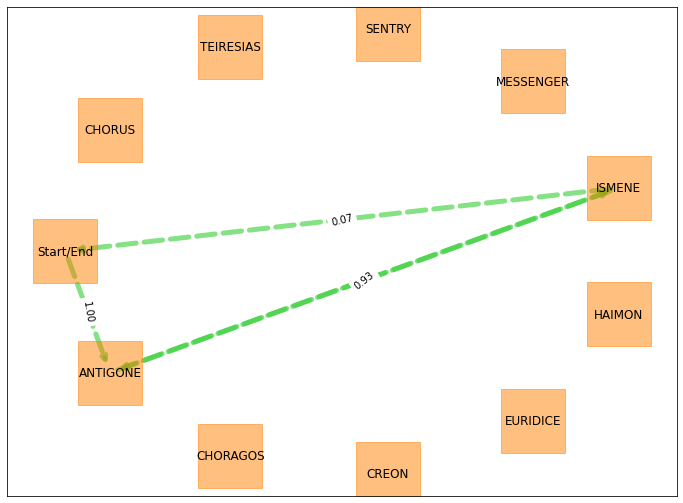

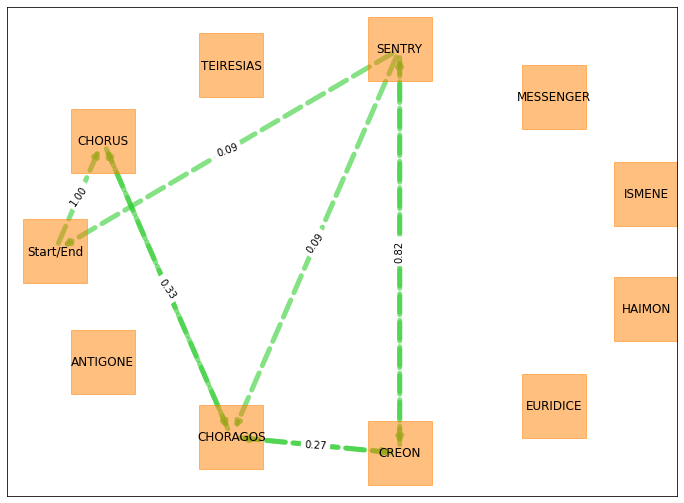

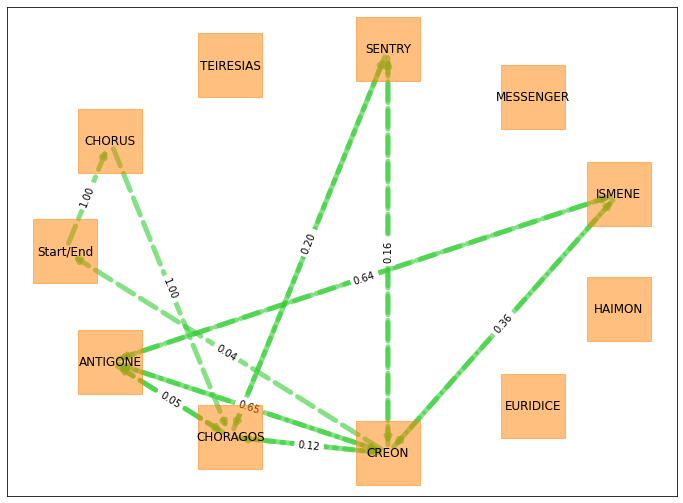

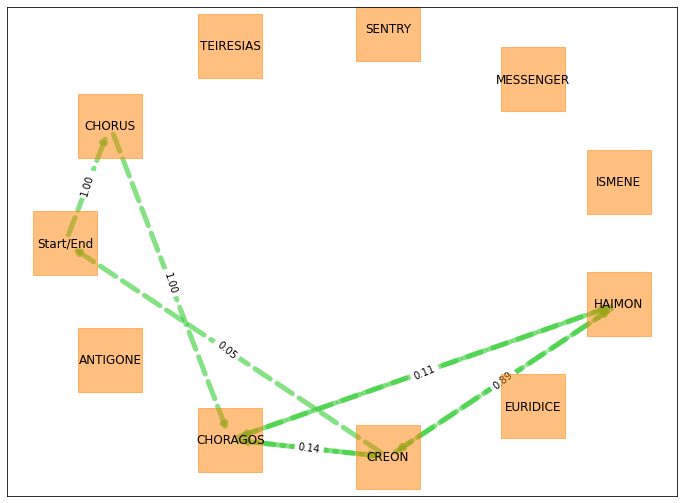

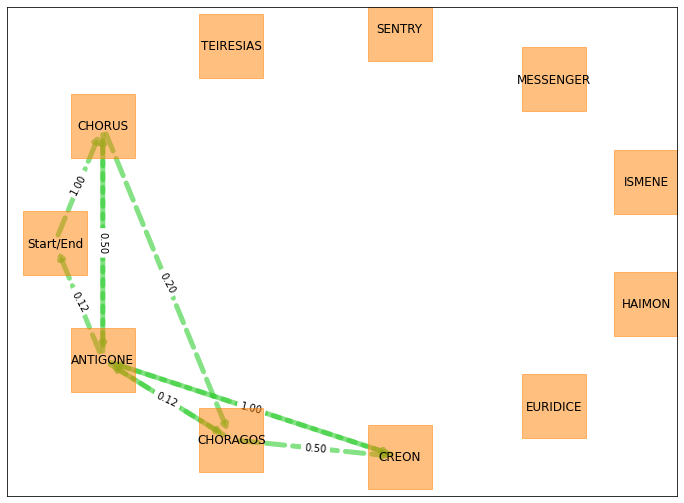

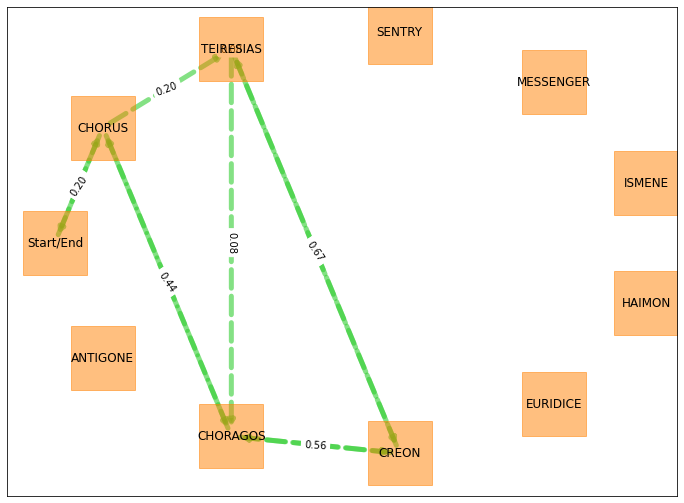

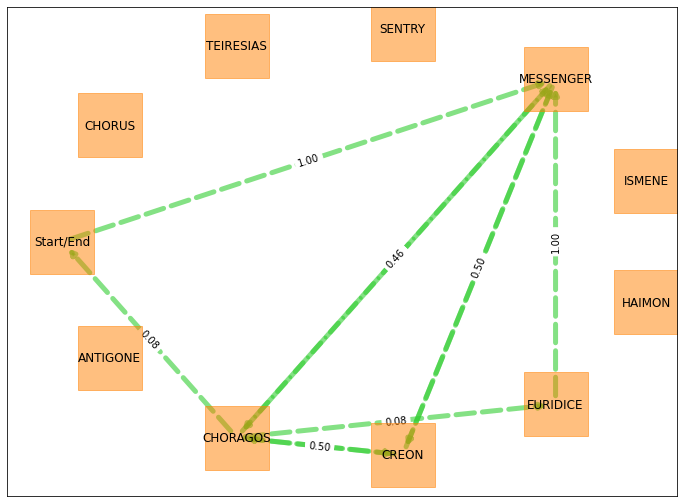

In [62]:
c = 0
cd = np.zeros((len(glob.glob("drive/MyDrive/Colab Notebooks/Antigone Simulation/*.txt")),len(all_chars)))
for loc in sorted(glob.glob("drive/MyDrive/Colab Notebooks/Antigone Simulation/*.txt")):
  with open(loc) as fp:
      xx = fp.readlines()
  order_of_speech = [x.strip() for x in xx]
  d = {x:order_of_speech.count(x) for x in order_of_speech}
  chars = ["Start/End"]
  chars += list(d.keys())
  P = np.zeros((len(chars),len(chars)))
  prev = chars.index(order_of_speech[0])
  for s in order_of_speech[1:]:
    current = chars.index(s)
    P[prev][current] += 1
    prev = current
  P[prev][chars.index("Start/End")] += 1
  P[chars.index("Start/End")][chars.index(order_of_speech[0])] += 1
  mapping = {}
  for i,v in enumerate(chars):
      mapping[i]=v
  P /=  P.sum(axis=1)[:,np.newaxis]
  mc = markovChain(P)
  mc.computePi('eigen')
  print("###",loc.split("/")[-1].replace(".txt",""))
  for i in range(len(chars)):
      print("%.4f # %s" % (mc.pi[i],mapping[i]))
      cd[c,all_chars.index(mapping[i])] = mc.pi[i]
  c += 1
  G = nx.DiGraph()
  for n in all_chars:
    G.add_node(n)
  labels={}
  edge_labels={}
  for i, origin_state in enumerate(chars):
      for j, destination_state in enumerate(chars):
          rate = P[i][j]
          if rate > 0:
              G.add_edge(origin_state,
                        destination_state,
                        weight=rate,
                        label="{:.02f}".format(rate))
              edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)
  plt.figure(figsize=(12,9))
  pos = nx.shell_layout(G)
  nx.draw_networkx_edges(G, pos, width = 5, alpha = 0.6, style = 'dashed', edge_color='#32CD32')
  nx.draw_networkx_labels(G, pos, font_weight=5)
  nx.draw_networkx_edge_labels(G, pos, edge_labels)
  nx.draw_networkx_nodes(G, pos, alpha=0.5, node_color='#FF8000',node_shape='s' , node_size=4000)

In [ ]:
number = 10000
avg = 0
for k in range (number):
  char_order = []
  for i in range(len(chars)):
    while True:
      random_character = all_chars[np.random.choice(11, 1, p=cd[i,:])[0]]
      if random_character == "Start/End":
        break
      char_order.append(random_character)
  avg += len(char_order)
print(avg/number)

197.5554
